In [12]:
import sys, os
sys.path.insert(0, os.path.dirname(os.path.abspath('../desdeo_emo')))
%matplotlib notebook

2019-11-21 14:39:33,966 - matplotlib.pyplot - DEBUG - Loaded backend nbAgg version unknown.


In [2]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from desdeo_problem.Problem import DataProblem

from desdeo_problem.surrogatemodels.SurrogateModels import GaussianProcessRegressor
from desdeo_problem.surrogatemodels.lipschitzian import LipschitzianRegressor

from desdeo_problem.testproblems.TestProblems import test_problem_builder
from pyDOE import lhs

from desdeo_emo.EAs.NSGAIII import NSGAIII
from desdeo_emo.EAs.RVEA import RVEA, oRVEA, robust_RVEA
from desdeo_emo.othertools.plotlyanimate import animate_init_, animate_next_

2019-11-21 14:37:53,060 - matplotlib.pyplot - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [3]:
problem_name = "ZDT2"
prob = test_problem_builder(problem_name)

In [4]:
x = lhs(30, 250)
y = prob.evaluate(x)

x_names = [f'x{i}' for i in range(1,31)]
y_names = ["f1", "f2"]

data = pd.DataFrame(np.hstack((x,y.objectives)), columns=x_names+y_names)

In [5]:
problem = DataProblem(data=data, variable_names=x_names, objective_names=y_names)

In [6]:
problem.train(LipschitzianRegressor)
evolver_L_opt = oRVEA(problem, use_surrogates=True)
while evolver_L_opt.continue_evolution():
    evolver_L_opt.iterate()
    
evolver_L = RVEA(problem, use_surrogates=True)
while evolver_L.continue_evolution():
    evolver_L.iterate()
    
evolver_L_robust = robust_RVEA(problem, use_surrogates=True)
while evolver_L_robust.continue_evolution():
    evolver_L_robust.iterate()

/home/rishi/Projects/desdeo-emo/desdeo_emo/selection/APD_Select.py:68: UserWarning:

RVEA.py line 60 cosine larger than 1 decreased to 1



In [7]:
problem.train(GaussianProcessRegressor)
evolver_G_opt = oRVEA(problem, use_surrogates=True)
while evolver_G_opt.continue_evolution():
    evolver_G_opt.iterate()
    
evolver_G = RVEA(problem, use_surrogates=True)
while evolver_G.continue_evolution():
    evolver_G.iterate()
    
evolver_G_robust = robust_RVEA(problem, use_surrogates=True)
while evolver_G_robust.continue_evolution():
    evolver_G_robust.iterate()

In [8]:
evolver_true = RVEA(prob)
while evolver_true.continue_evolution():
    evolver_true.iterate()

In [9]:
front_true = evolver_true.population.objectives
front_L = evolver_L.population.objectives
front_G = evolver_G.population.objectives
front_L_opt = evolver_L_opt.population.objectives - evolver_L_opt.population.uncertainity
front_G_opt = evolver_G_opt.population.objectives - evolver_G_opt.population.uncertainity
front_L_robust = evolver_L_robust.population.objectives + evolver_L_robust.population.uncertainity
front_G_robust = evolver_G_robust.population.objectives + evolver_G_robust.population.uncertainity

<IPython.core.display.Javascript object>


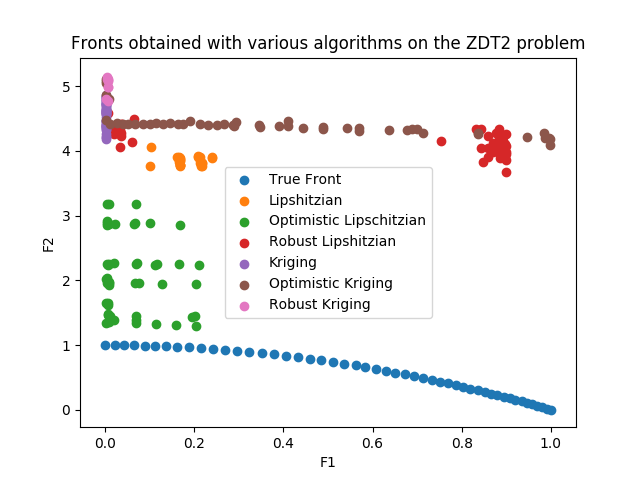

In [28]:
true = plt.scatter(x=front_true[:,0], y=front_true[:,1], label="True Front")
L = plt.scatter(x=front_L[:,0], y=front_L[:,1], label="Lipshitzian")
L_opt = plt.scatter(x=front_L_opt[:,0], y=front_L_opt[:,1], label="Optimistic Lipschitzian")
L_robust = plt.scatter(x=front_L_robust[:,0], y=front_L_robust[:,1], label="Robust Lipshitzian")
G = plt.scatter(x=front_G[:,0], y=front_G[:,1], label="Kriging")
G_opt = plt.scatter(x=front_G_opt[:,0], y=front_G_opt[:,1], label="Optimistic Kriging")
G_robust = plt.scatter(x=front_G_robust[:,0], y=front_G_robust[:,1], label="Robust Kriging")
plt.title(f"Fronts obtained with various algorithms on the {problem_name} problem")
plt.xlabel("F1")
plt.ylabel("F2")
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.tight_layout()

In [18]:
front_true = evolver_true.population.objectives
front_L = prob.evaluate(evolver_L.population.individuals).objectives
front_G = prob.evaluate(evolver_G.population.individuals).objectives
front_L_opt = prob.evaluate(evolver_L_opt.population.individuals).objectives
front_G_opt = prob.evaluate(evolver_G_opt.population.individuals).objectives
front_L_robust = prob.evaluate(evolver_L_robust.population.individuals).objectives
front_G_robust = prob.evaluate(evolver_G_robust.population.individuals).objectives